# 1. Introducción
Objetivo del cuaderno

Cargar imágenes del dataset.
Visualizar anotaciones (bounding boxes) asociadas a cada imagen.
Preparar los datos para modelos YOLOvX.
Código de introducción:

# Manipulación del Dataset para YOLOvX

Este cuaderno guía el proceso de carga, visualización y preparación del dataset para usar con la librería YOLOvX.

**Estructura esperada del dataset:**
```
dataset/
├── images/
│   ├── train/
│   ├── val/
├── labels/
│   ├── train/
    ├── val/
```


**Tareas:**
1. Cargar imágenes desde el disco.
2. Visualizar las cajas delimitadoras (bounding boxes) basadas en etiquetas YOLO.
3. Preparar los datos para entrenamiento con YOLOvX.


# 2. Importar bibliotecas necesarias

In [1]:
# Importar bibliotecas
import os
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from PIL import Image


# 3. Definir funciones de utilidad

In [2]:
# Función para cargar imágenes
def load_image(image_path):
    """Carga una imagen desde el archivo especificado."""
    return Image.open(image_path)

# Función para parsear etiquetas YOLO
def parse_yolo_label(label_path, image_width, image_height):
    """Convierte etiquetas YOLO en coordenadas de bounding boxes."""
    boxes = []
    with open(label_path, 'r') as file:
        lines = file.readlines()
        for line in lines:
            class_id, x_center, y_center, width, height = map(float, line.split())
            x_min = int((x_center - width / 2) * image_width)
            y_min = int((y_center - height / 2) * image_height)
            x_max = int((x_center + width / 2) * image_width)
            y_max = int((y_center + height / 2) * image_height)
            boxes.append((class_id, x_min, y_min, x_max, y_max))
    return boxes

# Función para visualizar una imagen con sus bounding boxes
def visualize_image_with_boxes(image_path, label_path):
    """Visualiza una imagen junto con sus bounding boxes."""
    img = load_image(image_path)
    boxes = parse_yolo_label(label_path, img.width, img.height)

    # Mostrar la imagen
    fig, ax = plt.subplots(1, figsize=(8, 8))
    ax.imshow(img)

    # Dibujar las bounding boxes
    for box in boxes:
        class_id, x_min, y_min, x_max, y_max = box
        rect = Rectangle((x_min, y_min), x_max - x_min, y_max - y_min,
                         linewidth=2, edgecolor='red', facecolor='none')
        ax.add_patch(rect)
        ax.text(x_min, y_min - 5, f"Class: {int(class_id)}", color='red', fontsize=10)

    plt.show()


# 4. Cargar y visualizar una imagen del conjunto de entrenamiento

In [21]:
# Ruta base al dataset desde el cuaderno
dataset_path = "../database"

# Rutas específicas
images_train_path = os.path.join(dataset_path, "images/train")
labels_train_path = os.path.join(dataset_path, "labels/train")

# Verifica que las rutas sean correctas
print("Ruta a imágenes de entrenamiento:", images_train_path)
print("Ruta a etiquetas de entrenamiento:", labels_train_path)



Ruta a imágenes de entrenamiento: ../database\images/train
Ruta a etiquetas de entrenamiento: ../database\labels/train


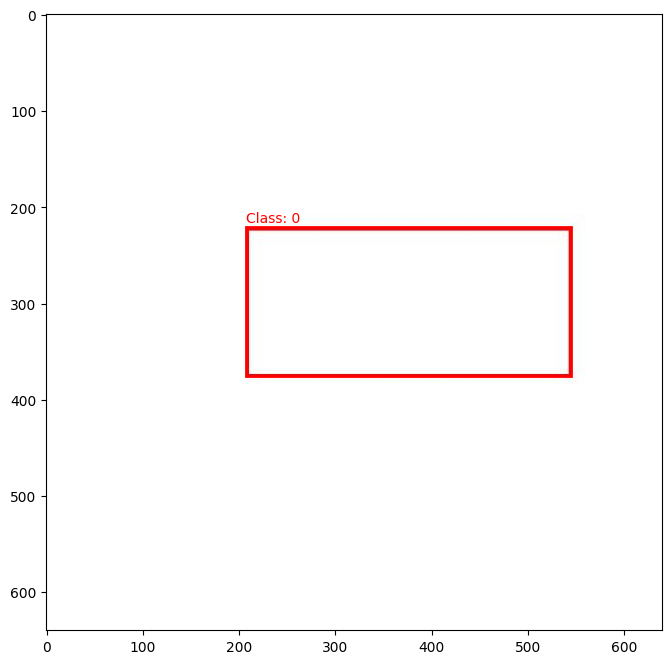

In [23]:
# Accede a una imagen y su etiqueta
image_file = os.path.join(images_train_path, "image_0.jpg")
label_file = os.path.join(labels_train_path, "image_0.txt")

# Visualizar la imagen con sus bounding boxes
visualize_image_with_boxes(image_file, label_file)


# 5. Visualizar múltiples imágenes

Visualizando ../database\images/train/image_0.jpg


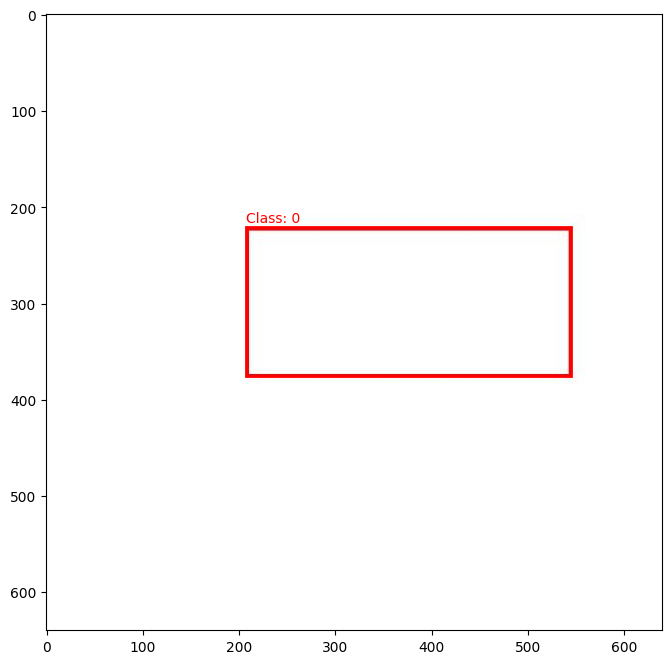

Visualizando ../database\images/train/image_1.jpg


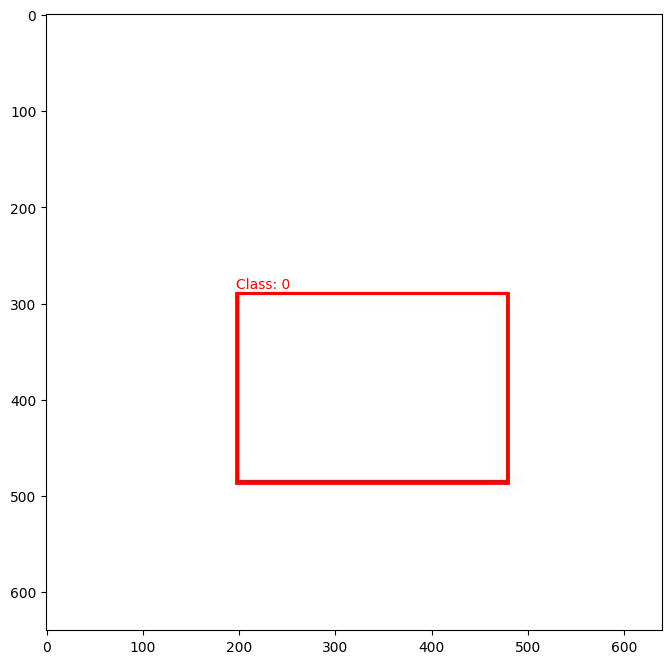

Visualizando ../database\images/train/image_2.jpg


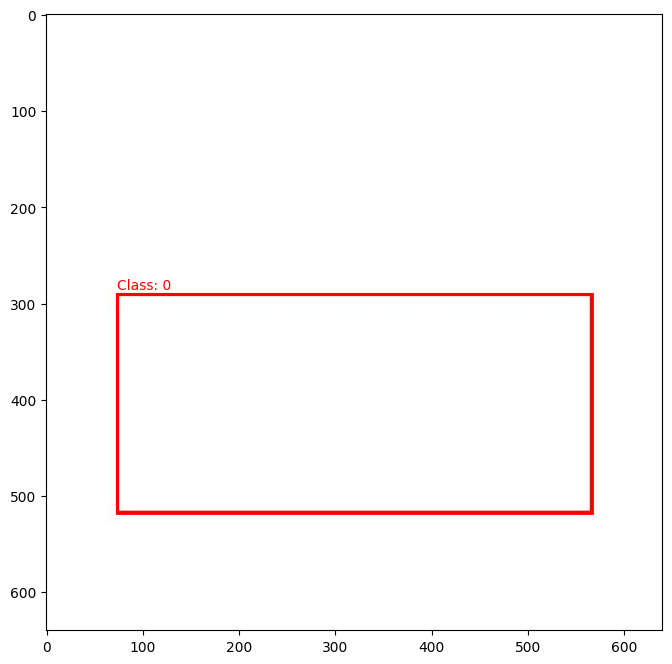

In [24]:
# Visualizar las primeras 3 imágenes del conjunto de entrenamiento
train_images_path = os.path.join(dataset_path, "images/train/")
train_labels_path = os.path.join(dataset_path, "labels/train/")

for i in range(3):
    image_file = os.path.join(train_images_path, f"image_{i}.jpg")
    label_file = os.path.join(train_labels_path, f"image_{i}.txt")
    print(f"Visualizando {image_file}")
    visualize_image_with_boxes(image_file, label_file)


# 6. Preparar los datos para YOLOvX

In [25]:
# Crear archivo de configuración YOLOvX
train_path = os.path.join(dataset_path, "images/train")
val_path = os.path.join(dataset_path, "images/val")

config_content = f"""
train: {train_path}
val: {val_path}

# Número de clases
nc: 1

# Nombres de las clases
names: ['class_name']
"""

config_file = os.path.join(dataset_path, "dataset.yaml")
with open(config_file, "w") as file:
    file.write(config_content)

print(f"Archivo de configuración guardado en: {config_file}")


Archivo de configuración guardado en: ../database\dataset.yaml
